# Sentiment Analysis in Keras LSTM Implementation

In [1]:
# Import the necesary packages
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
from keras.constraints import max_norm
from sklearn.model_selection import train_test_split
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
from PreProcessing import Cleaned_X_Y

In [2]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
filename = "set_3classes_clean.csv"

In [4]:
df = pd.read_csv(filename,header='infer')

In [5]:
df = df[['text', 'label', 'char_len', 'word_count']]
df.head()

,text,label,char_len,word_count
0,are wha,Positive,6,2
1,wha khubiya,Positive,10,2
2,everyone allah swt hamesha lawzo zaat sub hey,Positive,38,8
3,rab kreem reham watneaziz frmaamin,Positive,30,5
4,jaago coom jaago nokar humarey tex tankha paki...,Positive,54,10


In [6]:
df.describe()

,char_len,word_count
count,12491.000000,12491.000000
mean,26.364102,4.419102
std,24.732905,3.707943
min,6.000000,2.000000
25%,13.000000,2.000000
50%,20.000000,3.000000
75%,32.000000,5.000000
max,978.000000,102.000000


In [7]:
df.columns

Index(['text', 'label', 'char_len', 'word_count'], dtype='object')

In [8]:
X_data = df['text'].values
y_data = df['label'].values

In [9]:
print("Data available and its shapes: X : {}, Y : {}".format(X_data.shape, y_data.shape))

Data available and its shapes: X : (12491,), Y : (12491,)


In [10]:
corp = []
for sentence in X_data:
    corp = corp + sentence.split()
print("Total No of Words : ", len(corp))
print("Size of the Vocabuary : ", len(set(corp)))

Total No of Words :  55199
Size of the Vocabuary :  28543


In [11]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 10000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 20
# This is fixed.
EMBEDDING_DIM = 10

In [12]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(X_data)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 28543 unique tokens.


In [13]:
X = tokenizer.texts_to_sequences(X_data)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (12491, 20)


In [14]:
Y = pd.get_dummies(y_data).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (12491, 3)


In [15]:
# Train Test Split the data.
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(11241, 20) (11241, 3)
(1250, 20) (1250, 3)


In [16]:
# Construct the Model.
model = Sequential()
embedding_layer = Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1])
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(20, dropout=0.4, recurrent_dropout=0.3, kernel_constraint=max_norm(3), recurrent_constraint=max_norm(3), bias_constraint=max_norm(3)))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 10)            100000    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 20, 10)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 20)                2480      
_________________________________________________________________
dense (Dense)                (None, 3)                 63        
Total params: 102,543
Trainable params: 102,543
Non-trainable params: 0
_________________________________________________________________
None


In [21]:
embedding_layer.get_weights()

TypeError: 'Embedding' object is not subscriptable

In [63]:
epochs = 15
batch_size = 8
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/15
1265/1265 [==============================] - 130s 103ms/step - loss: 1.0926 - accuracy: 0.3736 - val_loss: 1.0883 - val_accuracy: 0.3956
Epoch 2/15
1265/1265 [==============================] - 136s 108ms/step - loss: 1.0728 - accuracy: 0.4275 - val_loss: 1.0677 - val_accuracy: 0.4293
Epoch 3/15
1265/1265 [==============================] - 137s 108ms/step - loss: 1.0141 - accuracy: 0.4970 - val_loss: 1.0062 - val_accuracy: 0.4969
Epoch 4/15
1265/1265 [==============================] - 137s 108ms/step - loss: 0.8909 - accuracy: 0.5829 - val_loss: 0.9281 - val_accuracy: 0.5636
Epoch 5/15
1265/1265 [==============================] - 136s 107ms/step - loss: 0.8015 - accuracy: 0.6342 - val_loss: 0.9199 - val_accuracy: 0.5627
Epoch 6/15
1265/1265 [==============================] - 137s 108ms/step - loss: 0.7415 - accuracy: 0.6731 - val_loss: 0.9703 - val_accuracy: 0.5467
Epoch 7/15
1265/1265 [==============================] - 198s 157ms/step - loss: 0.6926 - accuracy: 0.7019 - val_

In [64]:
# Evaluate the Model Accuracy on the Test data. 
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

40/40 [==============================] - 1s 17ms/step - loss: 0.9461 - accuracy: 0.5608
Test set
  Loss: 0.946
  Accuracy: 0.561


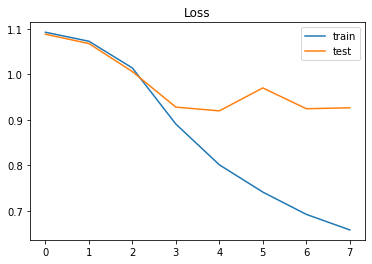

In [65]:
# Training vs Validation Loss Function
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

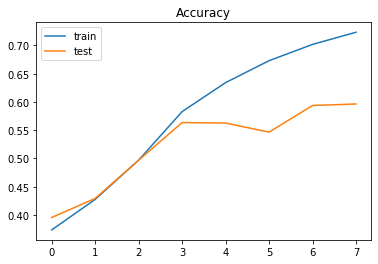

In [66]:
# Training vs Validation Accuracy
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [67]:
new_complaint = ['dil me khud aaka ho nala jm hai akbaal sjdo me pde rahna rahne se jnnat nahi milee yhi likha hai bahi']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['Negative','Neutral','Positive']
print(pred, labels[np.argmax(pred)])

[[0.1322907  0.06856202 0.7991473 ]] Positive
